Импорт библиотек

In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.layers as layers



Модуль для ограничения потребления видеопамяти (4 гига)

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (28, 28)

Загрузка данных для обучения и тестирования

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = y_train.astype('float32') 
y_test = y_test.astype('float32') 


In [5]:
print('X_train: '  + str(x_train.shape))
print('Y_train: '  + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [6]:
model = tf.keras.models.Sequential([
    layers.LSTM(64, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1]), dropout=0.2),
    
    layers.BatchNormalization(),
    
    layers.Dropout(0.5),
    layers.Dense(10)
])

Определение оптимизатора, метода расчета потерь и собираемых метрик

In [7]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(
    optimizer=opt,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 24,714
Trainable params: 24,586
Non-trainable params: 128
_________________________________________________________________


Обучение модели

In [8]:
result = model.fit(
    x=x_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(x_test,y_test),
    shuffle=True,
    verbose=True)

Epoch 1/20
1875/1875 [==============================] - 24s 11ms/step - loss: 0.9919 - sparse_categorical_accuracy: 0.6675 - val_loss: 0.3617 - val_sparse_categorical_accuracy: 0.8849
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4229 - sparse_categorical_accuracy: 0.8662 - val_loss: 0.2183 - val_sparse_categorical_accuracy: 0.9304
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2989 - sparse_categorical_accuracy: 0.9078 - val_loss: 0.3104 - val_sparse_categorical_accuracy: 0.8997
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2488 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.1546 - val_sparse_categorical_accuracy: 0.9494
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9349 - val_loss: 0.1193 - val_sparse_categorical_accuracy: 0.9620
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.

Проверка точности

In [9]:
score = model.evaluate(x = x_train,y = y_train, verbose=1)
print('Точность на обучающай выборке: {}%'.format(score[1]*100))

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9827
Точность на обучающай выборке: 98.27499985694885%


In [10]:
score = model.evaluate(x = x_test,y = y_test, verbose=1)
print('Точность на тестовой выборке: {}%'.format(score[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9793
Точность на тестовой выборке: 97.93000221252441%


Построение графиков

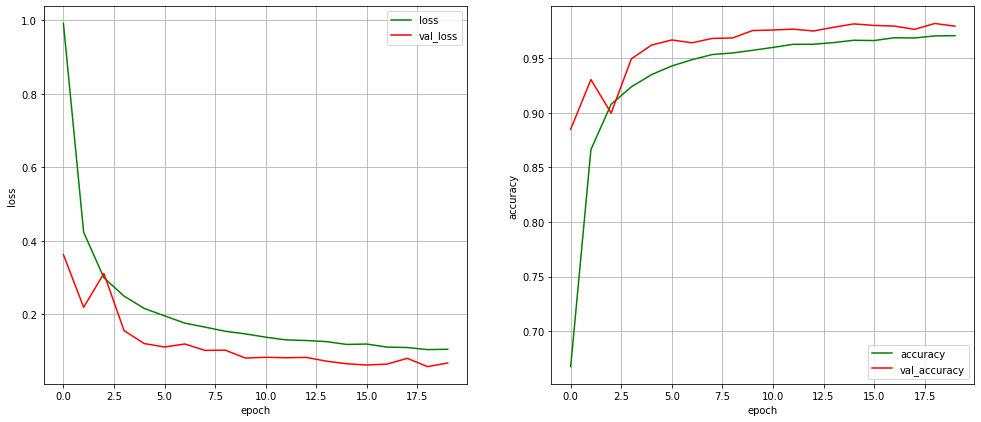

In [11]:
#Графики
px = 1/pyplot.rcParams['figure.dpi']
fig, (ax1,ax2) = pyplot.subplots(ncols=2, figsize=(1200*px,500*px))

ax1.plot(result.history['loss'], color='green')
ax1.plot(result.history['val_loss'], color='red')
ax1.legend(['loss','val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.grid(True)

ax2.plot(result.history['sparse_categorical_accuracy'], color='green')
ax2.plot(result.history['val_sparse_categorical_accuracy'], color='red')
ax2.legend(['accuracy','val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.grid(True)